In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv("indianEco.csv")
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')
dataset.set_index('Year', inplace=True)

# Selecting the column for inflation
column = "Inflation, consumer prices (annual %)"
data = dataset[[column]].values.astype(float)

# Normalize data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Function to split the data into train and test sets
def train_test_split(data, split_fraction):
    train_size = int(len(data) * split_fraction)
    train, test = data[:train_size], data[train_size:]
    return train, test

# Function to evaluate ARIMA model
def evaluate_arima_model(data, order):
    train, test = train_test_split(data, 0.8)
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

# Function to create input-output sequences for LSTM model
def create_dataset(data, n_lag, n_seq):
    X, y = [], []
    for i in range(len(data) - n_lag - n_seq + 1):
        end_ix = i + n_lag
        out_end_ix = end_ix + n_seq
        X.append(data[i:end_ix])
        y.append(data[end_ix:out_end_ix])
    return np.array(X), np.array(y)

# Function to evaluate LSTM model
def evaluate_lstm_model(data, n_lag, n_seq, n_batch):
    train, test = train_test_split(data, 0.8)
    train_X, train_y = create_dataset(train, n_lag, n_seq)
    test_X, test_y = create_dataset(test, n_lag, n_seq)
    train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
    test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))
    
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(n_seq))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=100, batch_size=n_batch, verbose=0)
    
    predictions = model.predict(test_X)
    predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])
    
    # Reshape test_y to match predictions
    test_y = test_y.reshape(test_y.shape[0], test_y.shape[1])
    
    error = mean_squared_error(test_y, predictions)
    return error

# Evaluate ARIMA model
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                mse = evaluate_arima_model(data_normalized, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                print('ARIMA%s MSE=%.3f' % (order, mse))
            except:
                continue
print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# Evaluate LSTM model
n_lag = 3
n_seq = 1
n_batch = 1
lstm_mse = evaluate_lstm_model(data_normalized, n_lag, n_seq, n_batch)
print('LSTM MSE=%.3f' % lstm_mse)

C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0) MSE=0.006


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1) MSE=0.003
ARIMA(0, 0, 2) MSE=0.004
ARIMA(0, 1, 0) MSE=0.003
ARIMA(0, 1, 1) MSE=0.006


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 2) MSE=0.003
ARIMA(0, 2, 0) MSE=0.004
ARIMA(0, 2, 1) MSE=0.003


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(0, 2, 2) MSE=0.009
ARIMA(1, 0, 0) MSE=0.004
ARIMA(1, 0, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 2) MSE=0.005
ARIMA(1, 1, 0) MSE=0.003


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 2) MSE=0.004
ARIMA(1, 2, 0) MSE=0.004
ARIMA(1, 2, 1) MSE=0.003


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 2, 2) MSE=0.005


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 0, 0) MSE=0.004
ARIMA(2, 0, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 0, 2) MSE=0.005
ARIMA(2, 1, 0) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2) MSE=0.004
ARIMA(2, 2, 0) MSE=0.003
ARIMA(2, 2, 1) MSE=0.004


C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\Admin\anaconda3\envs\AIcoures\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 2, 2) MSE=0.004
Best ARIMA(0, 1, 0) MSE=0.003
1/1 [==============================] - 1s 1s/step
LSTM MSE=0.004


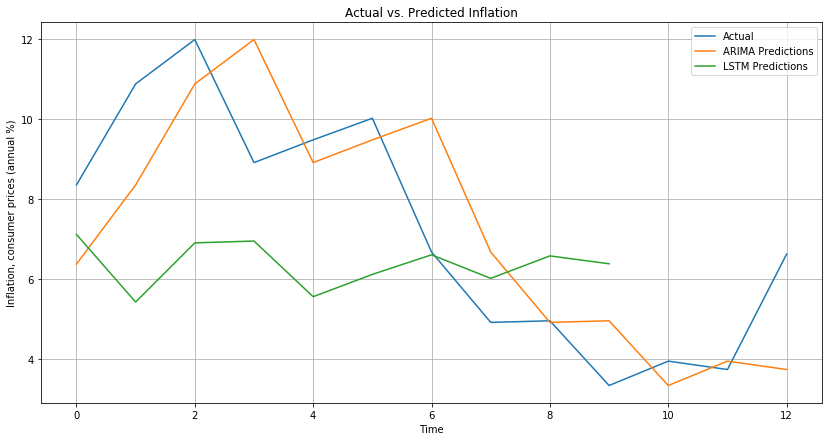

In [14]:
import matplotlib.pyplot as plt

# Function to make predictions using ARIMA model
def make_arima_predictions(data, order):
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    return predictions

# Function to make predictions using LSTM model
def make_lstm_predictions(data, n_lag, n_seq, n_batch):
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    train_X, train_y = create_dataset(train, n_lag, n_seq)
    test_X, test_y = create_dataset(test, n_lag, n_seq)
    train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
    test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(n_seq))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=100, batch_size=n_batch, verbose=0)

    predictions = model.predict(test_X)
    return predictions

import numpy as np

# Reshape arima_predictions to 2D array
arima_predictions = np.array(arima_predictions).reshape(-1, 1)
lstm_predictions = np.array(lstm_predictions).reshape(-1, 1)

# Inverse transform the predictions to original scale
arima_predictions = scaler.inverse_transform(arima_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Inverse transform the test data to original scale
test_data = scaler.inverse_transform(data_normalized[int(len(data_normalized)*0.8):])

# Plot actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(test_data, label='Actual')
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Inflation, consumer prices (annual %)')
plt.title('Actual vs. Predicted Inflation')
plt.legend()
plt.grid(True)
plt.show()
